In [1]:
# 3. Install Ultralytics ###
!pip install ultralytics
!pip install pyyaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

##Create yaml file

In [2]:
import yaml

file_path = '/content/drive/MyDrive/Work_space/Project/singfy/data/ASL Dataset/data.yaml'

with open(file_path, 'r') as file:
    data = yaml.safe_load(file)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 18, 'names': ['I', 'apple', 'can', 'get', 'good', 'have', 'help', 'how', 'like', 'love', 'my', 'no', 'sorry', 'thank-you', 'want', 'yes', 'you', 'your'], 'roboflow': {'workspace': 'asl-dataset', 'project': 'asl-dataset-p9yw8', 'version': 4, 'license': 'Public Domain', 'url': 'https://universe.roboflow.com/asl-dataset/asl-dataset-p9yw8/dataset/4'}}


In [3]:
classes=data["names"]
print(classes)

['I', 'apple', 'can', 'get', 'good', 'have', 'help', 'how', 'like', 'love', 'my', 'no', 'sorry', 'thank-you', 'want', 'yes', 'you', 'your']


In [4]:
dict_classes={}
for i, j in enumerate(classes):
  dict_classes[i]=j
print(dict_classes)


updated_dict = {key: int(value) if value.isdigit() else value for key, value in dict_classes.items()}

print(updated_dict)

{0: 'I', 1: 'apple', 2: 'can', 3: 'get', 4: 'good', 5: 'have', 6: 'help', 7: 'how', 8: 'like', 9: 'love', 10: 'my', 11: 'no', 12: 'sorry', 13: 'thank-you', 14: 'want', 15: 'yes', 16: 'you', 17: 'your'}
{0: 'I', 1: 'apple', 2: 'can', 3: 'get', 4: 'good', 5: 'have', 6: 'help', 7: 'how', 8: 'like', 9: 'love', 10: 'my', 11: 'no', 12: 'sorry', 13: 'thank-you', 14: 'want', 15: 'yes', 16: 'you', 17: 'your'}


In [5]:
%%writefile '/content/drive/MyDrive/Work_space/Project/singfy/data/ASL Dataset/words_detection_config.yaml'

path: '/content/drive/MyDrive/Work_space/Project/singfy/data/ASL Dataset' # dataset root dir
train: train # train images (relative to 'path')
val: valid  # val images (relative to 'path')

names:
  0: "I"
  1: 'apple'
  2: 'can'
  3: 'get'
  4: 'good'
  5: 'have'
  6: 'help'
  7: 'how'
  8: 'like'
  9: 'love'
  10: 'my'
  11: 'no'
  12: 'sorry'
  13: 'thank-you'
  14: 'want'
  15: 'yes'
  16: 'you'
  17: 'your'



Writing /content/drive/MyDrive/Work_space/Project/singfy/data/ASL Dataset/words_detection_config.yaml


##Train model

In [6]:
### 2. Define root directory ###
root_dir= "/content/drive/MyDrive/Work_space/Project/singfy/data/ASL Dataset"

In [7]:
### 4. Train model ###

import os

from ultralytics import YOLO


# Load a model
model = YOLO("yolov8s.pt")  # load pre trained model

# Use the model
results = model.train(data=os.path.join(root_dir, "words_detection_config.yaml"), epochs=100,imgsz=640,patience=50,batch=0.70,device=0,
                    )  # train the model

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 427MB/s]


Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Work_space/Project/singfy/data/ASL Dataset/words_detection_config.yaml, epochs=100, time=None, patience=50, batch=0.7, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fals

100%|██████████| 755k/755k [00:00<00:00, 117MB/s]


Overriding model.yaml nc=80 with nc=18

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 363MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Work_space/Project/singfy/data/ASL Dataset/train/labels... 459 images, 0 backgrounds, 0 corrupt: 100%|██████████| 459/459 [05:20<00:00,  1.43it/s]


train: New cache created: /content/drive/MyDrive/Work_space/Project/singfy/data/ASL Dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 70.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.15G reserved, 0.14G allocated, 14.45G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    11142566       28.68         0.828         40.05         251.2        (1, 3, 640, 640)                    list
    11142566       57.37         1.135          23.7         90.47        (2, 3, 640, 640)                    list
    11142566       114.7         1.709          30.6         88.98        (4, 3, 640, 640)                    list
    11142566       229.5         2.680 

train: Scanning /content/drive/MyDrive/Work_space/Project/singfy/data/ASL Dataset/train/labels.cache... 459 images, 0 backgrounds, 0 corrupt: 100%|██████████| 459/459 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Work_space/Project/singfy/data/ASL Dataset/valid/labels... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:57<00:00,  1.28s/it]

val: New cache created: /content/drive/MyDrive/Work_space/Project/singfy/data/ASL Dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000455, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005078125), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      13.6G      2.006      12.85      1.923          3        640: 100%|██████████| 8/8 [00:10<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

                   all         45         45    9.1e-05     0.0938   0.000805     0.0002



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      13.4G      1.803      11.08      1.791          4        640: 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.94s/it]

                   all         45         45    0.00568     0.0156    0.00386   0.000386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      13.5G      1.251      5.547      1.437          5        640: 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]

                   all         45         45      0.695     0.0931       0.12     0.0984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      13.5G      1.102      3.874       1.26          7        640: 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         45         45      0.425      0.159      0.182      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      13.5G     0.9063      3.166      1.137          3        640: 100%|██████████| 8/8 [00:08<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

                   all         45         45      0.351      0.478      0.428      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      13.5G     0.9231      2.598      1.106          6        640: 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         45         45      0.787      0.486      0.631      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      13.5G     0.8917       2.08      1.096         12        640: 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         45         45      0.577      0.517      0.524        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      13.5G     0.8466      1.888      1.091          4        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         45         45       0.58      0.496      0.576      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      13.5G     0.8079      1.477      1.059          7        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all         45         45      0.554      0.534      0.639      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      13.5G     0.8656      1.543      1.074          9        640: 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         45         45      0.574       0.58      0.529      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      13.5G     0.9145      1.513      1.149          5        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         45         45      0.585      0.652      0.616      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      13.5G     0.8894      1.449      1.118          5        640: 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         45         45      0.608      0.576      0.655      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      13.5G      0.786      1.212      1.058          6        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         45         45      0.711       0.47      0.636      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      13.5G     0.8618      1.172      1.089          4        640: 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         45         45      0.506      0.524      0.547      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      13.5G     0.8378      1.182      1.076          5        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         45         45      0.493      0.548      0.593      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      13.5G     0.8044      1.088      1.073          9        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         45         45      0.846      0.451      0.577      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      13.5G     0.8973      1.136      1.127          4        640: 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         45         45      0.614      0.509      0.612       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      13.5G     0.7235     0.8451      1.015          5        640: 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         45         45      0.825       0.49      0.614       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      13.5G     0.7583     0.9003      1.058          7        640: 100%|██████████| 8/8 [00:08<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         45         45      0.703      0.644      0.735      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      13.5G     0.7634     0.9051      1.018          5        640: 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         45         45      0.746      0.639      0.694      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      13.5G     0.7397     0.8482      1.017          8        640: 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         45         45       0.58      0.751      0.773      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      13.5G     0.7134     0.7469       1.02          7        640: 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         45         45      0.853      0.559      0.713      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      13.5G     0.7111     0.8393      1.012          5        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         45         45      0.858      0.529      0.607      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      13.5G     0.7743     0.8199      1.024          5        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         45         45      0.863      0.651      0.731      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      13.5G      0.685     0.7089     0.9798          6        640: 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         45         45      0.596      0.612      0.661      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      13.5G     0.6889     0.7619     0.9851         10        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         45         45      0.526       0.54      0.619      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      13.5G     0.6568     0.7088     0.9843          8        640: 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         45         45      0.711      0.783      0.785      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      13.5G     0.7317     0.7317      1.041          6        640: 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         45         45      0.696      0.737      0.806       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      13.5G      0.654     0.6797     0.9775          9        640: 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         45         45      0.759      0.773      0.875      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      13.5G     0.7215     0.7448     0.9986          5        640: 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         45         45      0.701      0.772      0.806      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      13.5G     0.6717     0.6605     0.9784          6        640: 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         45         45      0.819      0.769      0.862      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      13.5G     0.6366     0.6495     0.9914          4        640: 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         45         45      0.708      0.796      0.821      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      13.5G     0.5978     0.5778      0.955          5        640: 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         45         45      0.746      0.694      0.737      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      13.5G      0.717     0.7628      1.047          4        640: 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         45         45      0.742      0.786      0.814       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      13.5G     0.6311     0.5828     0.9886          4        640: 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         45         45      0.762      0.833       0.84      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      13.5G     0.6338     0.5917      1.002          4        640: 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         45         45      0.877      0.719      0.875      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      13.5G     0.6661     0.6375      1.009          5        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         45         45      0.881      0.662      0.798      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      13.5G     0.5867     0.5321     0.9593          8        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         45         45      0.854      0.659      0.737      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      13.5G     0.5923     0.5528     0.9501         11        640: 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         45         45      0.877      0.743      0.845      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      13.5G     0.5849      0.531     0.9457         10        640: 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         45         45      0.833      0.664      0.755      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      13.5G     0.6125     0.5269     0.9676          4        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         45         45      0.898      0.699      0.793      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      13.5G     0.6053     0.5982     0.9589          5        640: 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         45         45      0.899      0.742      0.833      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      13.5G     0.5676     0.4986     0.9492          6        640: 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         45         45      0.921      0.718      0.823      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      13.5G     0.5835     0.5097      0.951          8        640: 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         45         45      0.755      0.863      0.913      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      13.5G     0.5486     0.4898     0.9359          5        640: 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         45         45      0.937      0.742       0.84      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      13.5G     0.5813     0.4842     0.9513          6        640: 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         45         45      0.868      0.713      0.833      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      13.5G     0.5626     0.4801     0.9547          8        640: 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         45         45      0.901      0.697      0.757      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      13.5G     0.5659     0.4712     0.9527         10        640: 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         45         45      0.879      0.714      0.802      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      13.5G      0.544     0.4818     0.9674          3        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         45         45      0.954      0.693      0.866      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      13.5G     0.5318     0.4868     0.9249          8        640: 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         45         45       0.81      0.858       0.95      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      13.5G     0.5028     0.4254     0.9003          6        640: 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         45         45      0.736       0.83      0.898      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      13.5G     0.5265     0.4712     0.9421          7        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         45         45      0.828      0.748      0.878      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      13.5G     0.5292     0.4368     0.9355          7        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         45         45       0.79      0.772      0.855      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      13.5G     0.5274     0.4496     0.9367          7        640: 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         45         45      0.854      0.738      0.865      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      13.5G     0.5268     0.5003     0.9312          5        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         45         45      0.907      0.764      0.839      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      13.5G      0.539     0.4444     0.9262         10        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         45         45      0.933      0.747      0.859      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      13.5G     0.5205     0.4918     0.9431          7        640: 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         45         45      0.881      0.798      0.843      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      13.5G      0.538     0.4347     0.9483          6        640: 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         45         45      0.923      0.752      0.842      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      13.5G     0.4847     0.4032     0.9026          7        640: 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         45         45      0.877      0.746      0.843      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      13.5G     0.4757     0.4021      0.901          9        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         45         45      0.904      0.714       0.87      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      13.5G     0.4935      0.418     0.9277          4        640: 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         45         45      0.895      0.751      0.827      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      13.5G      0.519     0.4205     0.9416          6        640: 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         45         45       0.92      0.759      0.835       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      13.5G     0.4533     0.4099     0.9103          4        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         45         45      0.946      0.686      0.841      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      13.5G     0.4942     0.4074     0.9307          6        640: 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         45         45      0.937      0.686      0.882      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      13.5G     0.4853     0.4231      0.908          4        640: 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         45         45      0.824      0.772      0.871       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      13.5G     0.4917     0.3981     0.9157          5        640: 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         45         45       0.87      0.794       0.86      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      13.5G     0.5933     0.5209      1.016          5        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         45         45      0.928      0.745      0.844      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      13.5G     0.5112     0.4269     0.9207          8        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         45         45      0.934      0.721      0.849      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      13.5G     0.4732      0.424     0.9187          3        640: 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         45         45      0.916      0.722      0.847      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      13.5G     0.4608     0.3562     0.8978          6        640: 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         45         45      0.902      0.721      0.832      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      13.5G      0.474     0.3968     0.9153          8        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         45         45      0.846      0.732      0.886      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      13.5G     0.4582     0.3955     0.9122          7        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         45         45      0.737      0.829      0.884       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      13.5G     0.4655     0.4048     0.9143          5        640: 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         45         45      0.802      0.844      0.897      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      13.5G     0.4291     0.3603      0.896          5        640: 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         45         45       0.87      0.845      0.905      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      13.5G     0.4293     0.3527     0.9118          4        640: 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         45         45      0.824      0.844      0.919      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      13.5G     0.4227     0.3317     0.8735          7        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         45         45      0.783      0.873      0.937      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      13.5G     0.4424     0.3438     0.8878          6        640: 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         45         45      0.911      0.816      0.929      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      13.5G      0.412     0.3259     0.8804          8        640: 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         45         45       0.84      0.842      0.911      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      13.5G     0.4351     0.3472     0.8961          3        640: 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         45         45       0.82       0.87      0.904      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      13.5G      0.417     0.3194     0.8855          7        640: 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         45         45      0.914      0.765      0.931      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      13.5G     0.4363     0.3206     0.9044          8        640: 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         45         45      0.934      0.772       0.94      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      13.5G     0.4324     0.3301     0.8941         10        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         45         45      0.942       0.76      0.939      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      13.5G     0.3958      0.307     0.9083          4        640: 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         45         45       0.94      0.765      0.909      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      13.5G     0.4168     0.3153     0.8904          4        640: 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         45         45      0.926      0.764      0.891      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      13.5G     0.4373     0.3351     0.8851          9        640: 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         45         45      0.889      0.781      0.875      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      13.5G     0.4216     0.3321     0.8863          5        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         45         45      0.889       0.78      0.877      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      13.5G     0.4087     0.3018     0.8802         10        640: 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         45         45      0.891      0.777      0.879      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      13.5G     0.4283     0.3236     0.8952          6        640: 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         45         45      0.912      0.782      0.881      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      13.5G     0.3836     0.2986      0.878          4        640: 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         45         45      0.922      0.776      0.911      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      13.5G     0.4057     0.3024     0.8752          7        640: 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         45         45      0.781      0.886      0.912      0.712


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      13.5G     0.3016     0.2295     0.8191          4        640: 100%|██████████| 8/8 [00:14<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         45         45      0.765      0.889      0.925       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      13.5G      0.305     0.2318     0.8153          4        640: 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         45         45      0.917      0.775      0.925       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      13.5G     0.2975     0.2151     0.8228          4        640: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         45         45       0.92      0.767      0.947       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      13.5G     0.2995     0.2177     0.8254          4        640: 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         45         45      0.778      0.886      0.947      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      13.5G     0.2738       0.21     0.8173          4        640: 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         45         45      0.797      0.881      0.946      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      13.5G     0.2796     0.2061     0.8018          4        640: 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         45         45      0.863      0.855      0.944      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      13.5G     0.2915     0.2155     0.7968          4        640: 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         45         45      0.897      0.839      0.944       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      13.5G     0.2822     0.2113     0.7999          4        640: 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         45         45      0.912      0.828      0.943      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      13.5G     0.2778       0.22      0.794          4        640: 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         45         45      0.917      0.821      0.943      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      13.5G     0.2617     0.2078     0.8206          4        640: 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         45         45      0.925      0.817      0.943      0.736



100 epochs completed in 0.301 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,132,550 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


                   all         45         45       0.92      0.767      0.947      0.738
                     I          5          5          1      0.488      0.995      0.813
                 apple          2          2      0.956          1      0.995      0.783
                   can          1          1          1          0      0.995      0.199
                   get          4          4          1      0.735      0.842       0.77
                  good          3          3      0.979      0.667      0.713      0.328
                  have          2          2      0.956          1      0.995      0.925
                  help          1          1       0.67          1      0.995      0.895
                   how          5          5          1      0.923      0.995      0.823
                  like          1          1      0.478          1      0.995      0.796
                  love          3          3          1      0.749      0.995      0.917
                    m

# **Validation Metrics**
*Class*: The specific class or category of objects being evaluated.

*Images*: The number of images used for validation.

*Instances*: The total number of object instances across all validation images.

The metrics for all classes combined (all) and for individual classes (1 and 2) are as follows:

# **All Classes**
*Images*: 24: The number of images used in validation.

*Instances*: 115: The total number of object instances detected across all images.

*P (Precision)*: 0.687: The precision score, which measures the proportion of true positive detections out of all positive detections.

*R (Recall)*: 0.491: The recall score, which measures the proportion of true positive detections out of all actual positives.

*mAP50*: 0.573: The mean Average Precision at IoU threshold 0.5, a metric for evaluating object detection performance.

*mAP50-95*: 0.332: The mean Average Precision averaged over IoU thresholds from 0.5 to 0.95.

In [8]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
print(metrics.box.map)  # map50-95
print(metrics.box.map50)  # map50
print(metrics.box.map75)  # map75
print(metrics.box.maps) # a list contains map50-95 of each category

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,132,550 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/drive/MyDrive/Work_space/Project/singfy/data/ASL Dataset/valid/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]


                   all         45         45      0.921      0.767      0.947      0.736
                     I          5          5          1      0.487      0.995      0.813
                 apple          2          2      0.956          1      0.995      0.783
                   can          1          1          1          0      0.995      0.199
                   get          4          4          1      0.739      0.842      0.736
                  good          3          3      0.979      0.667      0.713      0.328
                  have          2          2      0.956          1      0.995      0.925
                  help          1          1       0.67          1      0.995      0.895
                   how          5          5          1      0.924      0.995      0.823
                  like          1          1      0.479          1      0.995      0.796
                  love          3          3          1      0.749      0.995      0.917
                    m

In [10]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Customize validation settings
validation_results = model.val(data=os.path.join(root_dir, "words_detection_config.yaml"), imgsz=640, batch=16, conf=0.25, iou=0.6, device="0")

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,132,550 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/drive/MyDrive/Work_space/Project/singfy/data/ASL Dataset/valid/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]


                   all         45         45       0.79      0.814      0.841      0.694
                     I          5          5          1        0.6        0.8      0.699
                 apple          2          2          1          1      0.995      0.809
                   can          1          1          0          0          0          0
                   get          4          4          1       0.75      0.875      0.766
                  good          3          3          1      0.667      0.833        0.4
                  have          2          2          1          1      0.995      0.933
                  help          1          1        0.5          1      0.995      0.895
                   how          5          5          1          1      0.995      0.828
                  like          1          1      0.333          1      0.995      0.796
                  love          3          3          1          1      0.995      0.923
                    m

In [11]:
print("validation_results map50:", validation_results.box.map50)

validation_results map50: 0.84083125


## Infernce


image 1/1 /content/drive/MyDrive/Work_space/Project/singfy/data/ASL Dataset/test/images/can6_png.rf.a9c927fbaeddf114b68a0e840c6f37d9.jpg: 640x640 1 can, 16.1ms
Speed: 3.4ms preprocess, 16.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
[[149.00244140625, 745.926513671875, 882.29345703125, 969.7836303710938, 0.9179112315177917, 2.0]]


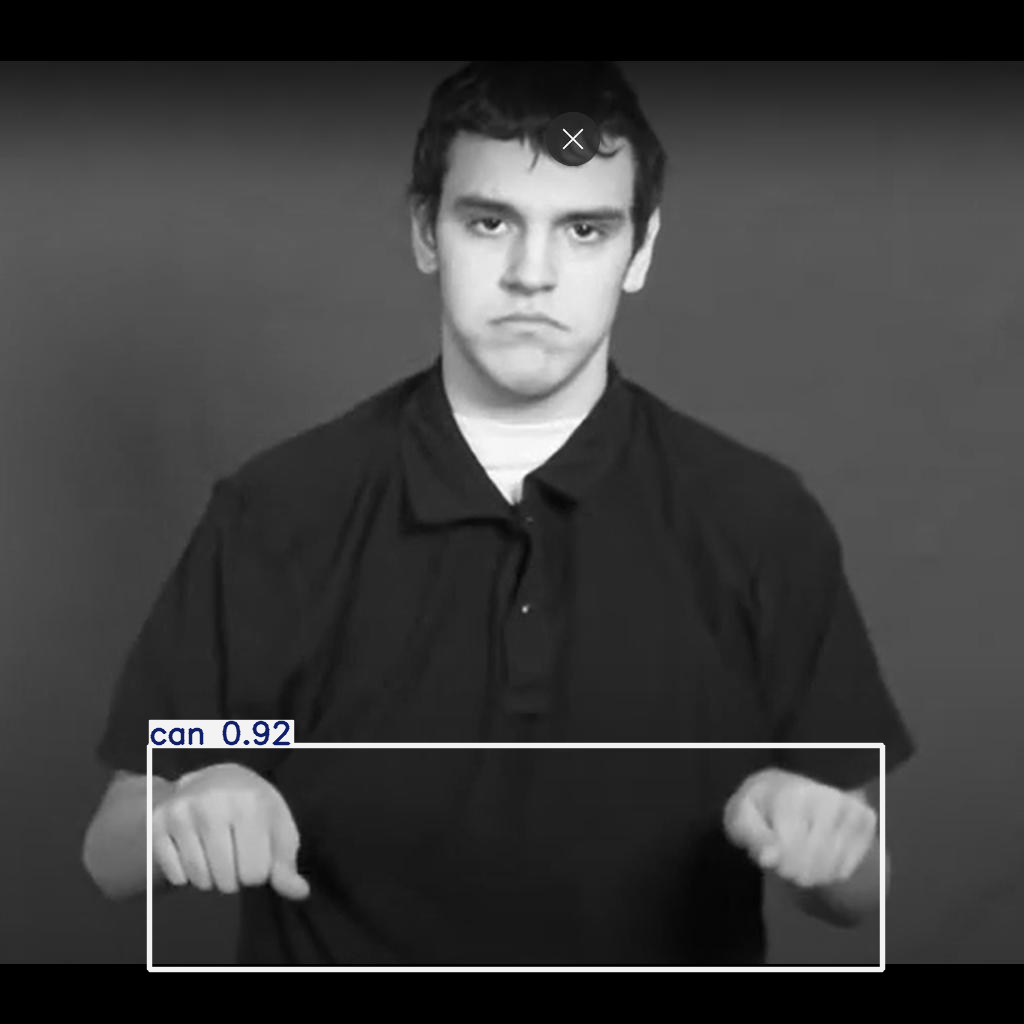

In [12]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolov8n.pt")  # pretrained YOLOv8n model
#model = YOLO("yolov8n.pt")
model_path="/content/runs/detect/train/weights/best.pt"

# Load a model
model = YOLO(model_path)  # load a custom model

# Run batched inference on a list of images
results = model("/content/drive/MyDrive/Work_space/Project/singfy/data/ASL Dataset/test/images/can6_png.rf.a9c927fbaeddf114b68a0e840c6f37d9.jpg")  # return a generator of Results objects


# Process results generator
for result in results:
    predict_out = result.boxes.data.tolist()
    print(predict_out)  # Boxes object for bounding box outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk


image 1/1 /content/drive/MyDrive/Work_space/Project/singfy/data/ASL Dataset/test/images/good8_JPG.rf.6d67a1a51c932ffa55c15a364335b075.jpg: 640x640 1 good, 16.1ms
Speed: 3.3ms preprocess, 16.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
[[361.4635925292969, 640.0121459960938, 613.53759765625, 778.1209106445312, 0.9522548317909241, 4.0]]


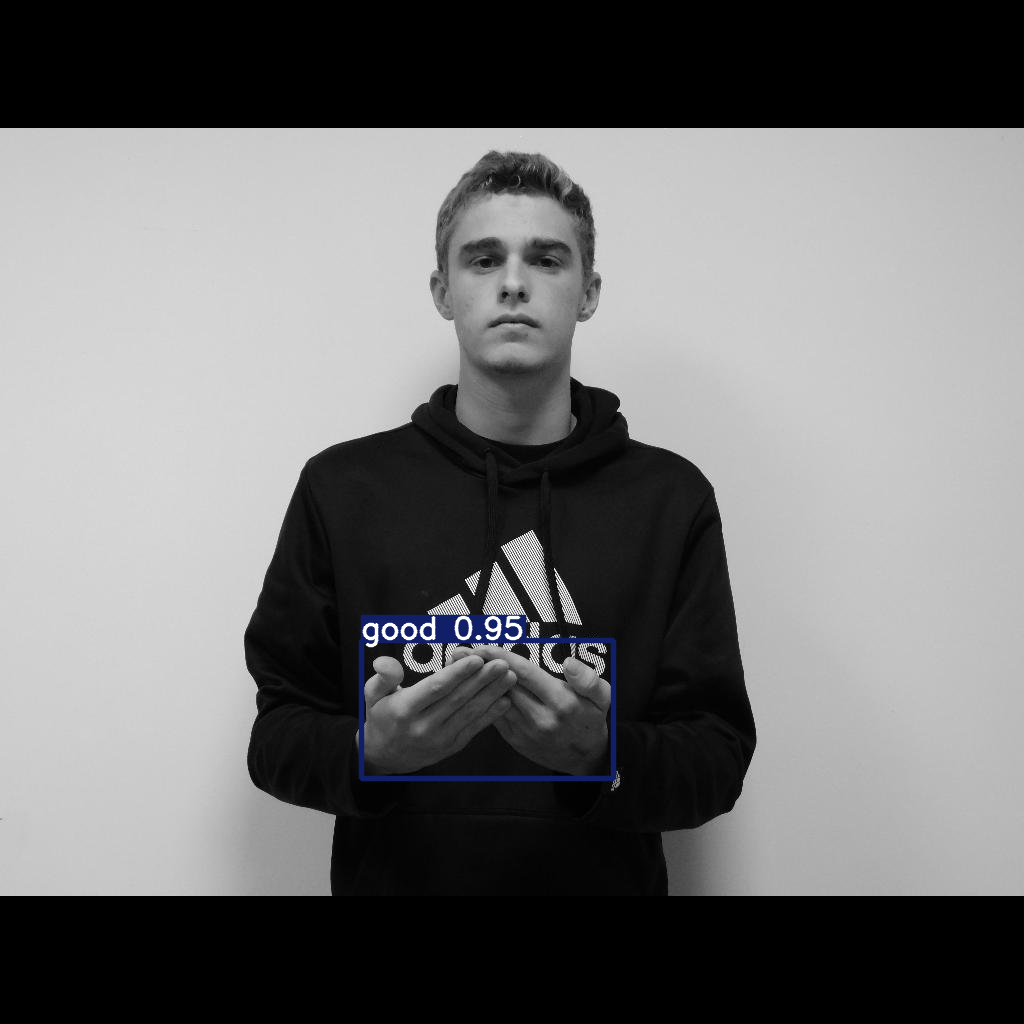

In [13]:
results = model("/content/drive/MyDrive/Work_space/Project/singfy/data/ASL Dataset/test/images/good8_JPG.rf.6d67a1a51c932ffa55c15a364335b075.jpg")


# Process results generator
for result in results:
    predict_out = result.boxes.data.tolist()
    print(predict_out)  # Boxes object for bounding box outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk

## save the model in drive

In [14]:
### 5. Copy results ###
import subprocess

# Set environment variables and run the scp command

command = "scp -r /content/runs/detect/train '/content/drive/MyDrive/Work_space/Project/singfy'"
process = subprocess.Popen(command, shell=True, env={"LC_ALL": "C.UTF-8", "LANG": "C.UTF-8"})
process.wait()

0